In [3]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from src.preprocessing import filter_and_clean

# Load raw data
df = pd.read_csv("../data/raw/complaints.csv")

df.shape


C:\Users\Hanan\AppData\Local\Temp\ipykernel_18068\473935047.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/complaints.csv")


(9609797, 18)

In [5]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

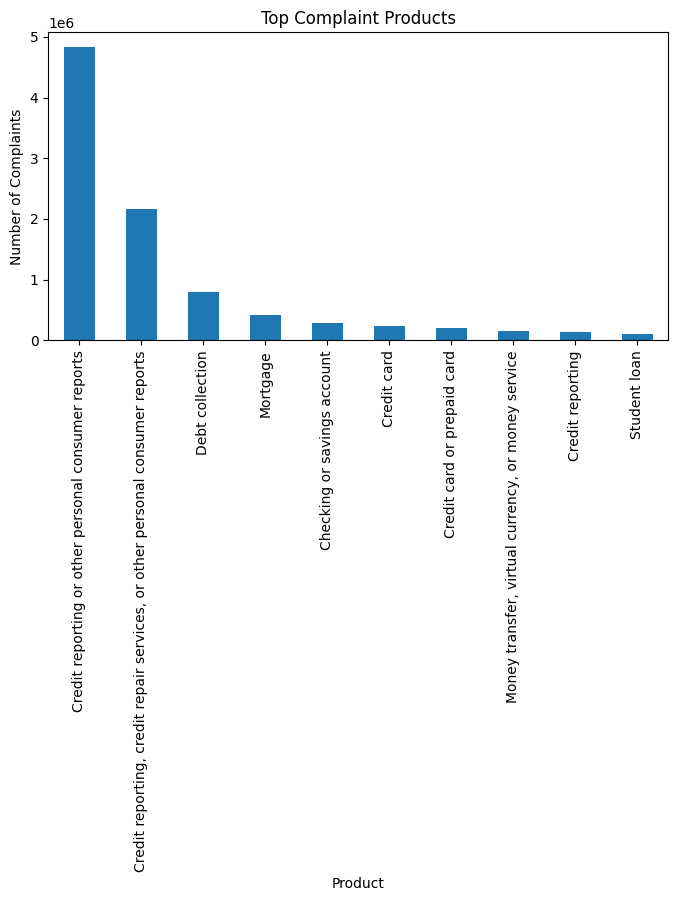

In [6]:
df["Product"].value_counts().head(10)
df["Product"].value_counts().head(10).plot(kind="bar", figsize=(8,4))
plt.title("Top Complaint Products")
plt.ylabel("Number of Complaints")
plt.show()


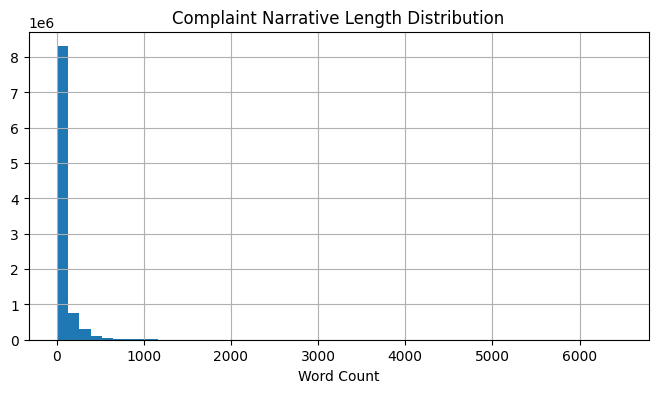

In [7]:
df["narrative_length"] = df["Consumer complaint narrative"].astype(str).apply(
    lambda x: len(x.split())
)

df["narrative_length"].describe()
df["narrative_length"].hist(bins=50, figsize=(8,4))
plt.title("Complaint Narrative Length Distribution")
plt.xlabel("Word Count")
plt.show()


In [8]:
df["Consumer complaint narrative"].isna().value_counts()


Consumer complaint narrative
True     6629041
False    2980756
Name: count, dtype: int64

In [9]:
clean_df = filter_and_clean(df)

clean_df.shape


(80667, 20)

In [10]:
clean_df[["Product", "clean_narrative"]].head()


,Product,clean_narrative
12237,Credit card,a xxxx xxxx card was opened under my name by a...
13280,Credit card,"dear cfpb, i have a secured credit card with c..."
13506,Credit card,i have a citi rewards cards. the credit balanc...
13955,Credit card,b i am writing to dispute the following charge...
14249,Credit card,"although the account had been deemed closed, i..."


In [11]:
clean_df.to_csv(
    "../data/processed/filtered_complaints.csv",
    index=False
)
